#  Classification of genetic interactions  using Support Vector Machine(SVM)

Although cancer classification has improved over the past 30 years, there has been no general approach for identifying new cancer classes (class discovery) or for assigning tumors to known classes (class prediction). 
The dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes.
The goal is to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL) using the SVM algorithm.

Lets start coding :)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 

In [82]:

#############patients/genes########################################

data_synthetic_lethals=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\version-control-functions\data-from-yeastmine-queries\data_synthetic_lethals_from_list_yeastmine.xlsx',header=2)
data_synthetic_lethals.drop(['Unnamed: 0'],axis=1)

## non synthetc lethals
data_dosage_rescue=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\version-control-functions\data-from-yeastmine-queries\data_dosage_rescue_from_list_yeastmine.xlsx',header=2)
data_dosage_rescue.drop(['Unnamed: 0'],axis=1)


##################features(data to use for the prediction)###############################
##curated data on slim go terms in budding yeast SGD downloads
data_raw_slim_go=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\slim-goterms-filtered-data.xlsx',header=0,encoding="utf-8-sig")

## published data in the cellmap.org 2016 
data_fitness_sga=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\SGA-Boone-LAB\Data File S1. Raw genetic interaction datasets_ Pair-wise interaction format\Data-fitness.xlsx',header=0,sheet_name='NxN')

## curated data set on interactions in budding yeast SGD downloads
data_raw_interact=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\interaction-filtered-data.xlsx',header=0,encoding="utf-8-sig")


data_raw_slim_go.columns=['Gene','gene-id','go-aspect','go-term','go-id','feature-type' ]
data_raw_interact.columns=['Gene', 'Interactor', 'Assay', 'Annotation', 'Notes','Phenotype','Reference-SGD','citation']
data_fitness_sga.columns=['query-strain','query-allele-name','array-strain','array-allele-name','array-type','score','p-value','query-fitness','array-fitness','double-fitness','double-fitness-std']


In [89]:
train_data=defaultdict(dict)
target_gene='ACT1'

synt_lethals_target_gene=data_synthetic_lethals[data_synthetic_lethals['name']==target_gene]['interactor']
non_synt_lethals_target_gene=data_dosage_rescue[data_dosage_rescue['name']==target_gene]['interactor']


for i in synt_lethals_target_gene:
    counter=0
    go_per_synt_gene=data_raw_slim_go[data_raw_slim_go['Gene']==i]['go-term'].tolist()

    for j in go_per_synt_gene:
        counter=counter+1
        train_data[i][counter]=j
        train_data[i]['lethal']=1
    interactor_per_synt_gene=data_raw_interact[data_raw_interact['Gene']==i]['Interactor'].tolist()
    for k in interactor_per_synt_gene:
        counter=counter+1
        train_data[i][counter]=k
        train_data[i]['lethal']=1
    

for i in non_synt_lethals_target_gene:
    counter=0 ## when adding new rows
    go_per_non_synt_gene=data_raw_slim_go[data_raw_slim_go['Gene']==i]['go-term'].tolist()
    for j in go_per_non_synt_gene:
        counter=counter+1
        train_data[i][counter]=j
        train_data[i]['lethal']=0
    interactor_per_non_synt_gene=data_raw_interact[data_raw_interact['Gene']==i]['Interactor'].tolist()
    for k in interactor_per_non_synt_gene:
        counter=counter+1
        train_data[i][counter]=k
        train_data[i]['lethal']=0


train_data=pd.DataFrame(train_data)
train_data=train_data.T.fillna('no-info')
train_data.index=np.arange(0,len(synt_lethals_target_gene)+len(non_synt_lethals_target_gene)-1) 

train_data

,1,lethal,2,3,4,5,6,7,8,9,...,866,867,868,869,870,871,872,873,874,875
0,cell cortex,1,cytoplasm,cytoskeleton,nucleus,site of polarized growth,cytoskeletal protein binding,cytokinesis,cytoskeleton organization,protein complex biogenesis,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
1,cell cortex,1,cellular bud,cytoplasm,membrane,mitochondrion,plasma membrane,site of polarized growth,RNA binding,enzyme regulator activity,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
2,cell cortex,1,cellular bud,cytoplasm,cytoskeleton,membrane,plasma membrane,site of polarized growth,cytoskeletal protein binding,cytoskeleton organization,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
3,cell cortex,1,cytoplasm,cytoskeleton,membrane,plasma membrane,cytoskeletal protein binding,Golgi vesicle transport,cytoskeleton organization,endocytosis,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
4,cytoplasm,1,endomembrane system,endoplasmic reticulum,oxidoreductase activity,lipid metabolic process,SSS1,HOM2,ATP5,ERG28,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
5,cytoplasm,1,mitochondrion,nucleolus,nucleus,RNA binding,rRNA processing,ribosomal small subunit biogenesis,UTP20,UTP20,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
6,cell cortex,1,cellular bud,cytoplasm,cytoskeleton,membrane,nucleus,plasma membrane,site of polarized growth,"protein binding, bridging",...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
7,cytoplasm,1,membrane,plasma membrane,cytoskeletal protein binding,ion binding,lipid binding,cytoskeleton organization,protein complex biogenesis,regulation of organelle organization,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
8,nucleolus,1,nucleus,unfolded protein binding,protein complex biogenesis,rRNA processing,ribosomal small subunit biogenesis,RIO2,NOB1,KEL3,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info
9,cytoplasm,1,endomembrane system,endoplasmic reticulum,membrane,molecular_function,lipid transport,FLO9,NDE2,RAD9,...,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info,no-info


Now join all the datasets and transpose the final joined data.

In [6]:
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]
df_all = df_all.T
df_all

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-154,-136,49,180,-257,-273,141,-123,52,878,...,214,540,13,1075,-45,524,249,40,-68,-1
69,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,409,617,-34,738,11,742,234,72,109,-30
70,-55,-44,12,129,-108,-301,-222,-133,136,320,...,131,318,35,241,-66,320,174,-4,176,40
71,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,214,760,-38,201,-55,348,208,0,74,-12


After transpose, the rows have been converted to columns(7129 columns/features)

Now 
1. convert patient column to a numeric value and 
2. create dummy variables(converts categories into numeric values) since ‘cancer’ is a cateogorical column having 2 categories(ALL, AML).

In [92]:
train_data["patient"] = np.arange(0,len(synt_lethals_target_gene)+len(non_synt_lethals_target_gene)-1) 

Now join data frames df_all and labels on patient column.

Our next step is to create two variables X(matrix of independent variables) and y(vector of the dependent variable).

In [ ]:
X,y=train_data.drop(columns=['lethal']),train_data['lethal']


Next, 
We split 75% of the data into training set while 25% of the data to test set. 
The *test_size* variable is where we actually specify the proportion of the test set.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

Next step is :
to normalize the data because if we closely look at the data the range of values of independent variables varies a lot.

So when the values vary a lot in independent variables, we use **feature scaling** so that all the values remain in the comparable range.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##########ERROR########## because my features are strings

The number of columns/features that we have been working with is huge. 
We have 72 rows and 7129 columns. 
Basically we need to decrease the number of features(Dimentioanlity Reduction) to remove the possibility of [ Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

For reducing the number of dimensions/features we will use the most popular dimensionality reduction algorithm i.e. **PCA(Principal Component Analysis)**.
To perform PCA we have to choose the number of features/dimensions that we want in our data.

In [13]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

38



The above code gives k=38.
Now let us take k=38 and apply PCA on our independent variables.

Text(0.5, 1.0, 'Around 90% of variance is explained by the First 38 columns ')

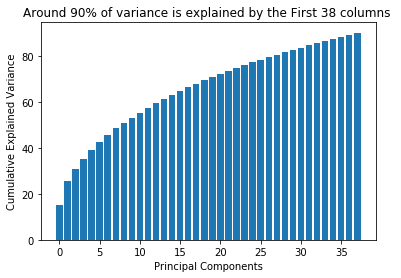

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 38)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(38), cum_sum)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.title("Around 90% of variance is explained by the First 38 columns ")

**Note:- PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.**
The next step is to fit our data into the Support Vector Machine(SVM) algorithm but before doing that we will perform Hyperparameter optimization.

> [Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization) or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned

We will use GridSearchCV from sklearn for choosing the best hyperparameters.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Now check what are the best parameters for our SVM algorithm

In [25]:
best_parameters = search.best_estimator_
print(best_parameters)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Now let's train our SVM classification model.

In [32]:
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

It is time for some predictions!

In [33]:
y_pred=model.predict(X_test)

 Evaluating model performance

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
print('Accuracy Score:',round(accuracy_score(y_test, y_pred),2))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)


Accuracy Score: 0.67


Confusion matrix and visualize it using Heatmap.

Text(0.5, 257.44, 'Predicted label')

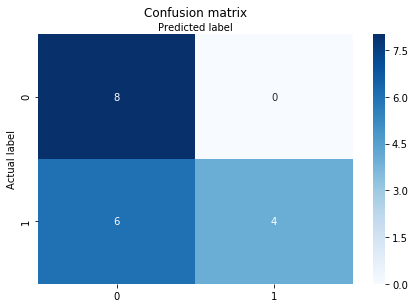

In [40]:
class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
class_names=['ALL', 'AML']

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
pd.DataFrame(cm)

,0,1
0,8,0
1,6,4


Well, this example goes to show that if you just predict that every patient has AML, you’ll be correct more often than wrong.

So our SVM classification model predicted the cancer patients with 67% accuracy which is of course not that good.

What you can do is try different classifiers like Random forest, K-NN, Gradient Boosting, xgboost etc and compare the accuracies for each model.